<a href="https://colab.research.google.com/github/shivkumarganesh/MachineLearning-Course/blob/main/Assignment1/ML_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [707]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from IPython.display import display, HTML
from sklearn.tree import _tree, DecisionTreeClassifier
import tensorflow as tf
from sklearn.cluster import AgglomerativeClustering

In [708]:
# Utility functions

# Data Load Function
def load_data(url):
  return pd.read_csv(url)

# Date Series Creator
def generate_date_series(start_date, end_date):
  return pd.date_range(start=start_date, end=end_date)

# Combine the various CSV's based on the date column
def combine_data(original_data_frame, input_data):
  return original_data_frame.merge(input_data ,how='outer',left_on='date', right_on='date')

# Inpute the NA values with the mean of the entire column
def impute_values(original_data_frame, cols):
  return original_data_frame[cols].fillna(original_data_frame[cols].mean())

# Data Import
Importing data from various data sources **[Macro Trends](https://www.macrotrends.net/countries/USA/)** 
- United States Carbon CO2 Emissions Data
- United-States Coal Usage Consumption Data
- United States Fossil Fuel Consumption Data
- United States GDP Gross Domestic Product Data
- United States GDP Growth Rate Data
- United States GDP New Data
- United States GHG Greenhouse Gas Emissions Data
- United States Population Data
- United States Poverty Rate Data
- United States Unemployment Rate Data

In [709]:
DATA_URL_ARRAY = {
    'CO2_EMISSION':'https://raw.githubusercontent.com/shivkumarganesh/MachineLearning-Course/main/Data/united-states-carbon-co2-emissions.csv',
    'COAL_USAGE': 'https://raw.githubusercontent.com/shivkumarganesh/MachineLearning-Course/main/Data/united-states-coal-usage-consumption.csv',
    'FOSSIL_FUEL': 'https://raw.githubusercontent.com/shivkumarganesh/MachineLearning-Course/main/Data/united-states-fossil-fuel-consumption.csv',
    'GROWTH_RATE': 'https://raw.githubusercontent.com/shivkumarganesh/MachineLearning-Course/main/Data/united-states-gdp-growth-rate.csv',
    'GREEN_HOUSE_EMISSION':'https://raw.githubusercontent.com/shivkumarganesh/MachineLearning-Course/main/Data/united-states-ghg-greenhouse-gas-emissions.csv',
    'POVERTY_RATE': 'https://raw.githubusercontent.com/shivkumarganesh/MachineLearning-Course/main/Data/united-states-poverty-rate.csv',
    'UNEMPLOYMENT':'https://raw.githubusercontent.com/shivkumarganesh/MachineLearning-Course/main/Data/united-states-unemployment-rate.csv',
    'POPULATION': 'https://raw.githubusercontent.com/shivkumarganesh/MachineLearning-Course/main/Data/united-states-population.csv',
    'GDP_DOMESTIC': 'https://raw.githubusercontent.com/shivkumarganesh/MachineLearning-Course/main/Data/united-states-gdp_new.csv'
}


co2_emission_df = load_data(DATA_URL_ARRAY['CO2_EMISSION'])
coal_usage_df = load_data(DATA_URL_ARRAY['COAL_USAGE'])
fossil_fuel_df = load_data(DATA_URL_ARRAY['FOSSIL_FUEL'])
growth_rate_df = load_data(DATA_URL_ARRAY['GROWTH_RATE'])
green_house_emission_df = load_data(DATA_URL_ARRAY['GREEN_HOUSE_EMISSION'])
poverty_rate_df = load_data(DATA_URL_ARRAY['POVERTY_RATE'])
unemployment_df = load_data(DATA_URL_ARRAY['UNEMPLOYMENT'])
population_df = load_data(DATA_URL_ARRAY['POPULATION'])
gdp_domestic_df = load_data(DATA_URL_ARRAY['GDP_DOMESTIC'])

# Inspecting each dataframe

## CO2 emission Data

In [710]:
co2_emission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  57 non-null     object 
 1   KT_CO2                57 non-null     float64
 2   Metric_TON_PerCapita  57 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


In [711]:
co2_emission_df.head()

,date,KT_CO2,Metric_TON_PerCapita
0,1960-12-31,2890696.100,15.9998
1,1961-12-31,2880505.507,15.6813
2,1962-12-31,2987207.873,16.0139
3,1963-12-31,3119230.874,16.4828
4,1964-12-31,3255995.306,16.9681


## Coal usage data

In [712]:
coal_usage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    56 non-null     object 
 1   Elect_frm_Coal_Percent  56 non-null     float64
 2   Elect_Annual_Change     56 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.4+ KB


In [713]:
coal_usage_df.head()

,date,Elect_frm_Coal_Percent,Elect_Annual_Change
0,1960-12-31,53.9120,0.00
1,1961-12-31,53.7305,-0.18
2,1962-12-31,53.2502,-0.48
3,1963-12-31,54.3901,1.14
4,1964-12-31,54.0154,-0.37


## Fossil Fuel Data

In [714]:
fossil_fuel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       56 non-null     object 
 1   Energy_Fossil_Use_Percent  56 non-null     float64
 2   Fossil_Enr_Annual_Change   56 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.4+ KB


In [715]:
fossil_fuel_df.head()

,date,Energy_Fossil_Use_Percent,Fossil_Enr_Annual_Change
0,1960-12-31,95.5257,0.00
1,1961-12-31,95.5668,0.04
2,1962-12-31,95.6055,0.04
3,1963-12-31,95.7693,0.16
4,1964-12-31,95.8016,0.03


## Growth Rate Data


In [716]:
growth_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  59 non-null     object 
 1   GDP_Growth_Percent    59 non-null     float64
 2   Growth_Annual_Change  59 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


In [717]:
growth_rate_df.head()

,date,GDP_Growth_Percent,Growth_Annual_Change
0,1961-12-31,2.3,0.0
1,1962-12-31,6.1,3.8
2,1963-12-31,4.4,-1.7
3,1964-12-31,5.8,1.4
4,1965-12-31,6.4,0.6


## Green House Emission Data

In [718]:
green_house_emission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                43 non-null     object 
 1   KT_CO2              43 non-null     float64
 2   CO2_Annual_Change   43 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.1+ KB


In [719]:
green_house_emission_df.head()

,date,KT_CO2,CO2_Annual_Change
0,1970-12-31,5400503.50,0.00
1,1971-12-31,5440420.62,0.74
2,1972-12-31,5704297.25,4.85
3,1973-12-31,5912971.38,3.66
4,1974-12-31,5756864.10,-2.64


## Poverty Rate Data

In [720]:
poverty_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      12 non-null     object 
 1   percentage_below_poverty  12 non-null     float64
 2   poverty_percent_Change    12 non-null     float64
dtypes: float64(2), object(1)
memory usage: 416.0+ bytes


In [721]:
poverty_rate_df.head()

,date,percentage_below_poverty,poverty_percent_Change
0,1974-12-31,1.7,0.0
1,1979-12-31,1.2,-0.5
2,1986-12-31,1.2,0.0
3,1991-12-31,1.2,0.0
4,1994-12-31,1.5,0.3


## Unemployment Data

In [722]:
unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        29 non-null     object 
 1   Unemployment_Rate           29 non-null     float64
 2   Unemployment_Annual_Change  29 non-null     float64
dtypes: float64(2), object(1)
memory usage: 824.0+ bytes


In [723]:
unemployment_df.head()

,date,Unemployment_Rate,Unemployment_Annual_Change
0,1991-12-31,6.800,0.00
1,1992-12-31,7.500,0.70
2,1993-12-31,6.900,-0.60
3,1994-12-31,6.119,-0.78
4,1995-12-31,5.650,-0.47


## Population Data

In [724]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      71 non-null     object 
 1   Population                71 non-null     int64  
 2   Population_Annual_Change  71 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.8+ KB


In [725]:
population_df.head()

,date,Population,Population_Annual_Change
0,1950-12-31,158804395,0.00
1,1951-12-31,160872266,1.30
2,1952-12-31,163266028,1.49
3,1953-12-31,165910003,1.62
4,1954-12-31,168736387,1.70


## Domestic GDP Data

In [726]:
gdp_domestic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       72 non-null     object 
 1   gdp        72 non-null     float64
 2   percapita  72 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.8+ KB


In [727]:
gdp_domestic_df.head()

,date,gdp,percapita
0,1947-12-31,998.462,1719.223702
1,1948-12-31,1097.871,1881.308846
2,1949-12-31,1089.901,1824.273628
3,1950-12-31,1199.309,1973.347351
4,1951-12-31,1387.653,2254.245934


# Data Aggregation
As the data is in a format where each and every csv file has date parameter. We will try to integrate data based on Date as the primary key. So the steps in which we will be performing this operation is as follows:-

1. Create dataframe with a single row which contains date from 1900 to 2019. (This is the range in which our date lies)
2. Rename and Assign correct datetype to the dates generated so that they can be merged easily.
3. Concatinate this with the entire data set based on date(Basically perform a merge)


In [728]:
# STEP1 - Generated a Dataframe with just the date in range
df = generate_date_series('1900-01-01', '2020-12-31')

In [729]:
# STEP2 - Rename and assign correct data type
df = pd.DataFrame({ 'date': df})
df['date'] = df['date'].astype(str)

In [730]:
# Check the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44195 entries, 0 to 44194
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    44195 non-null  object
dtypes: object(1)
memory usage: 345.4+ KB


In [731]:
# STEP3 - Merge the dataframe with the CSV imports based on dates
for data in [co2_emission_df,coal_usage_df,fossil_fuel_df,growth_rate_df,green_house_emission_df,poverty_rate_df,unemployment_df, population_df, gdp_domestic_df]:
  df = combine_data(df, data)

df.head()

,date,KT_CO2_x,Metric_TON_PerCapita,Elect_frm_Coal_Percent,Elect_Annual_Change,Energy_Fossil_Use_Percent,Fossil_Enr_Annual_Change,GDP_Growth_Percent,Growth_Annual_Change,KT_CO2_y,CO2_Annual_Change,percentage_below_poverty,poverty_percent_Change,Unemployment_Rate,Unemployment_Annual_Change,Population,Population_Annual_Change,gdp,percapita
0,1900-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1900-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1900-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1900-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

## Removing NAN
We need to remove the rows that have all the values as NaN apart form dates.

In [732]:
df = df.dropna(subset=df.columns[1:], how='all')
df.head()

,date,KT_CO2_x,Metric_TON_PerCapita,Elect_frm_Coal_Percent,Elect_Annual_Change,Energy_Fossil_Use_Percent,Fossil_Enr_Annual_Change,GDP_Growth_Percent,Growth_Annual_Change,KT_CO2_y,CO2_Annual_Change,percentage_below_poverty,poverty_percent_Change,Unemployment_Rate,Unemployment_Annual_Change,Population,Population_Annual_Change,gdp,percapita
17530,1947-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,998.462,1719.223702
17896,1948-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1097.871,1881.308846
18261,1949-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1089.901,1824.273628
18626,1950-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158804395.0,0.0,1199.309,1973.347351
18991,1951-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160872266.0,1.3,1387.653,2254.245934


## Imputing Values
We will be imputing the NaN values with mean values of the columns

In [733]:
for col in df.columns[1:]:
  df[col] = impute_values(df, col)

df.head(200)

,date,KT_CO2_x,Metric_TON_PerCapita,Elect_frm_Coal_Percent,Elect_Annual_Change,Energy_Fossil_Use_Percent,Fossil_Enr_Annual_Change,GDP_Growth_Percent,Growth_Annual_Change,KT_CO2_y,CO2_Annual_Change,percentage_below_poverty,poverty_percent_Change,Unemployment_Rate,Unemployment_Annual_Change,Population,Population_Annual_Change,gdp,percapita
17530,1947-12-31,4.734172e+06,19.012072,50.139952,-0.351607,89.289663,-0.233929,3.034549,-0.002373,6.267232e+06,0.416047,1.458333,0.0,5.85569,-0.107241,2.446810e+08,1.040563,998.462000,1719.223702
17896,1948-12-31,4.734172e+06,19.012072,50.139952,-0.351607,89.289663,-0.233929,3.034549,-0.002373,6.267232e+06,0.416047,1.458333,0.0,5.85569,-0.107241,2.446810e+08,1.040563,1097.871000,1881.308846
18261,1949-12-31,4.734172e+06,19.012072,50.139952,-0.351607,89.289663,-0.233929,3.034549,-0.002373,6.267232e+06,0.416047,1.458333,0.0,5.85569,-0.107241,2.446810e+08,1.040563,1089.901000,1824.273628
18626,1950-12-31,4.734172e+06,19.012072,50.139952,-0.351607,89.289663,-0.233929,3.034549,-0.002373,6.267232e+06,0.416047,1.458333,0.0,5.85569,-0.107241,1.588044e+08,0.000000,1199.309000,1973.347351
18991,1951-12-31,4.734172e+06,19.012072,50.139952,-0.351607,89.289663,-0.233929,3.034549,-0.002373,6.267232e+06,0.416047,1.458333,0.0,5.85569,-0.107241,1.608723e+08,1.300000,1387.653000,2254.245934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42733,2016-12-31,5.006302e+06,15.502200,50.139952,-0.351607,89.289663,-0.233929,1.637800,-1.270000,6.267232e+06,0.416047,1.700000,0.0,4.86900,-0.410000,3.230160e+08,0.670000,74828.755000,57902.926170
43098,2017-12-31,4.734172e+06,19.012072,50.139952,-0.351607,89.289663,-0.233929,2.369800,0.730000,6.267232e+06,0.416047,1.458333,0.0,4.35500,-0.510000,3.250848e+08,0.640000,77941.576000,59847.241630
43463,2018-12-31,4.734172e+06,19.012072,50.139952,-0.351607,89.289663,-0.233929,2.927300,0.560000,6.267232e+06,0.416047,1.458333,0.0,3.89600,-0.460000,3.270963e+08,0.620000,82002.542000,62718.009410
43828,2019-12-31,4.734172e+06,19.012072,50.139952,-0.351607,89.289663,-0.233929,2.161200,-0.770000,6.267232e+06,0.416047,1.458333,0.0,3.68200,-0.210000,3.290649e+08,0.600000,23934.144486,21232.686715


In [734]:
df.describe()

,KT_CO2_x,Metric_TON_PerCapita,Elect_frm_Coal_Percent,Elect_Annual_Change,Energy_Fossil_Use_Percent,Fossil_Enr_Annual_Change,GDP_Growth_Percent,Growth_Annual_Change,KT_CO2_y,CO2_Annual_Change,percentage_below_poverty,poverty_percent_Change,Unemployment_Rate,Unemployment_Annual_Change,Population,Population_Annual_Change,gdp,percapita
count,7.400000e+01,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,7.400000e+01,74.000000,74.000000,74.000000,74.000000,74.000000,7.400000e+01,74.000000,74.000000,74.000000
mean,4.734172e+06,19.012072,50.139952,-0.351607,89.289663,-0.233929,3.034549,-0.002373,6.267232e+06,0.416047,1.458333,0.000000,5.855690,-0.107241,2.446810e+08,1.040563,23934.144486,21232.686715
std,6.792540e+05,1.538292,4.415347,1.523750,3.950639,0.326231,1.825455,2.119155,4.020417e+05,2.197847,0.092837,0.102034,1.003468,0.554795,4.951872e+07,0.316084,24067.517762,18730.064545
min,2.880506e+06,15.502200,34.232700,-5.420000,82.427800,-1.060000,-2.536800,-6.190000,5.400504e+06,-6.730000,1.200000,-0.500000,3.682000,-1.210000,1.588044e+08,0.000000,998.462000,1719.223702
25%,4.543088e+06,18.628900,49.190050,-0.862500,86.094450,-0.390000,2.402350,-0.770000,6.135621e+06,0.110000,1.458333,0.000000,5.855690,-0.207500,2.062691e+08,0.900000,3040.284500,3888.170434
50%,4.734172e+06,19.012072,50.139952,-0.351607,89.289663,-0.233929,3.034549,-0.002373,6.267232e+06,0.416047,1.458333,0.000000,5.855690,-0.107241,2.437221e+08,0.940000,15343.301000,16314.906195
75%,5.131418e+06,19.652925,53.024350,0.310000,91.788125,-0.002500,4.102825,0.715000,6.328556e+06,0.700000,1.458333,0.000000,5.855690,-0.107241,2.866115e+08,1.170000,40387.702000,35908.265477
max,5.789727e+06,22.510600,57.679300,3.660000,95.982200,0.950000,7.236600,6.390000,7.244272e+06,7.700000,1.700000,0.500000,9.633000,3.470000,3.310027e+08,1.760000,82002.542000,62718.009410


# Data Visualization


## Correlation Matrix
Below is a correlation matrix. We can derive the following points easily form the same.

1. GDP Growth Rate is dependent on most of the factors
2. Population Annual Change is negatively correlated with Co2 emission.

We will target these two in our further analysis

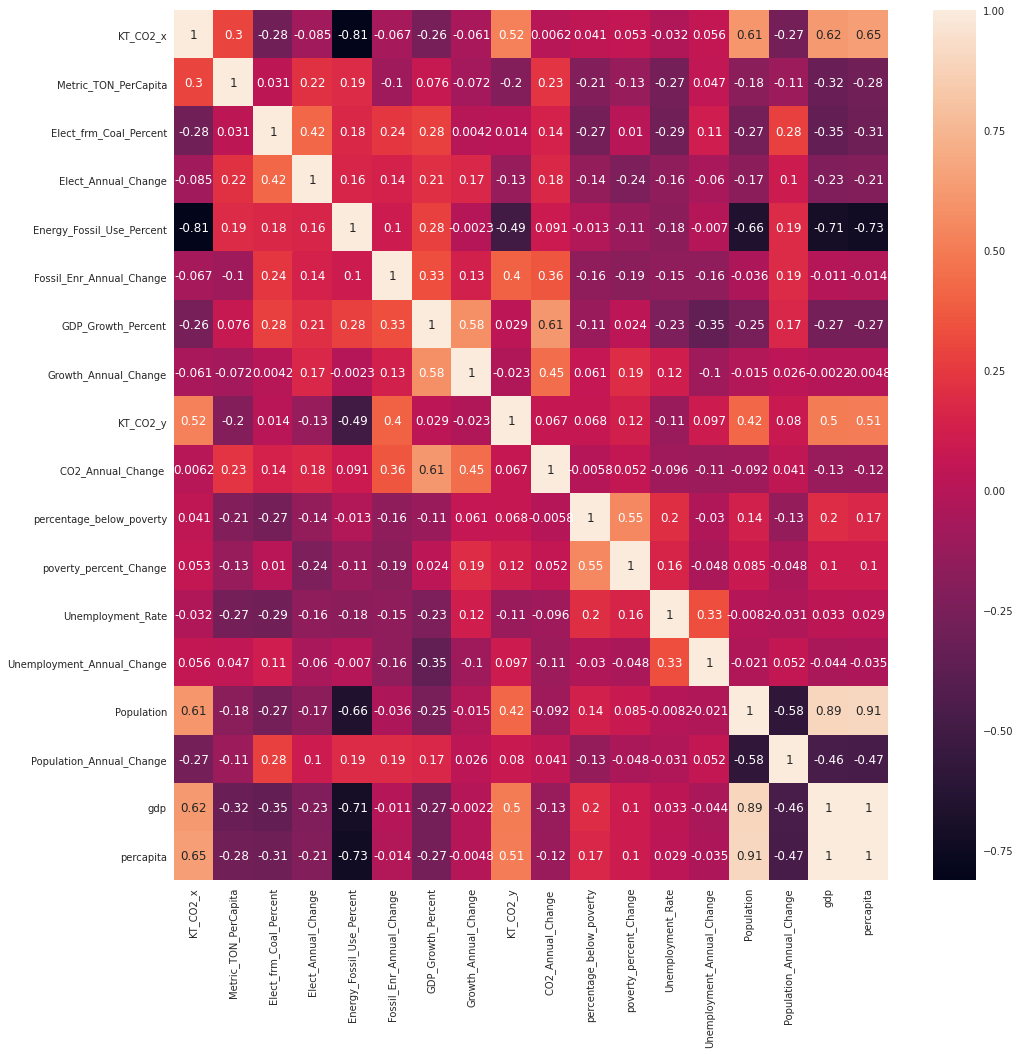

In [735]:
corr = df.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr, annot=True)


After seeing the above. I feel that most of the rates will be useful in order to deal with the data. Because Rate of change will not always be linear whereas the other data points can be linear. So we will restructure the data a bit and then re perform the correlation matrix.

In [736]:
df.columns

Index(['date', 'KT_CO2_x', 'Metric_TON_PerCapita', 'Elect_frm_Coal_Percent',
       'Elect_Annual_Change', 'Energy_Fossil_Use_Percent',
       'Fossil_Enr_Annual_Change', 'GDP_Growth_Percent',
       'Growth_Annual_Change', 'KT_CO2_y', 'CO2_Annual_Change ',
       'percentage_below_poverty', 'poverty_percent_Change',
       'Unemployment_Rate', 'Unemployment_Annual_Change', 'Population',
       'Population_Annual_Change', 'gdp', 'percapita'],
      dtype='object')

In [737]:
df = df[['date', 'KT_CO2_x', 'Metric_TON_PerCapita', 'Elect_frm_Coal_Percent', 'Energy_Fossil_Use_Percent', 'GDP_Growth_Percent','Growth_Annual_Change', 'CO2_Annual_Change ','percentage_below_poverty','Unemployment_Rate','Population_Annual_Change', 'percapita']]

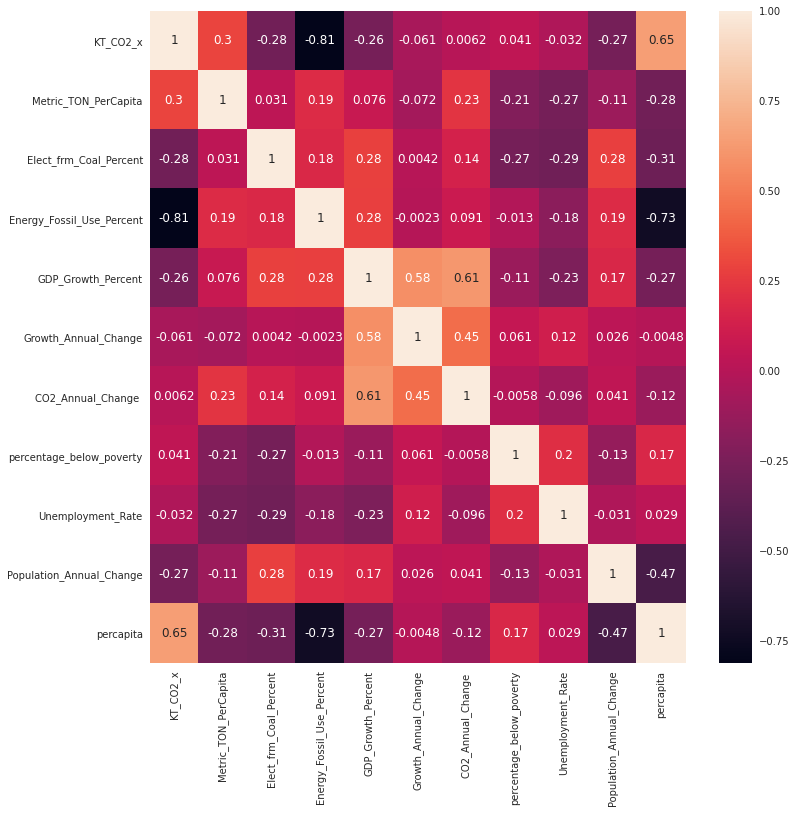

In [738]:
corr = df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True)

## Creating Pair plot for further understanding

<Figure size 864x864 with 0 Axes>

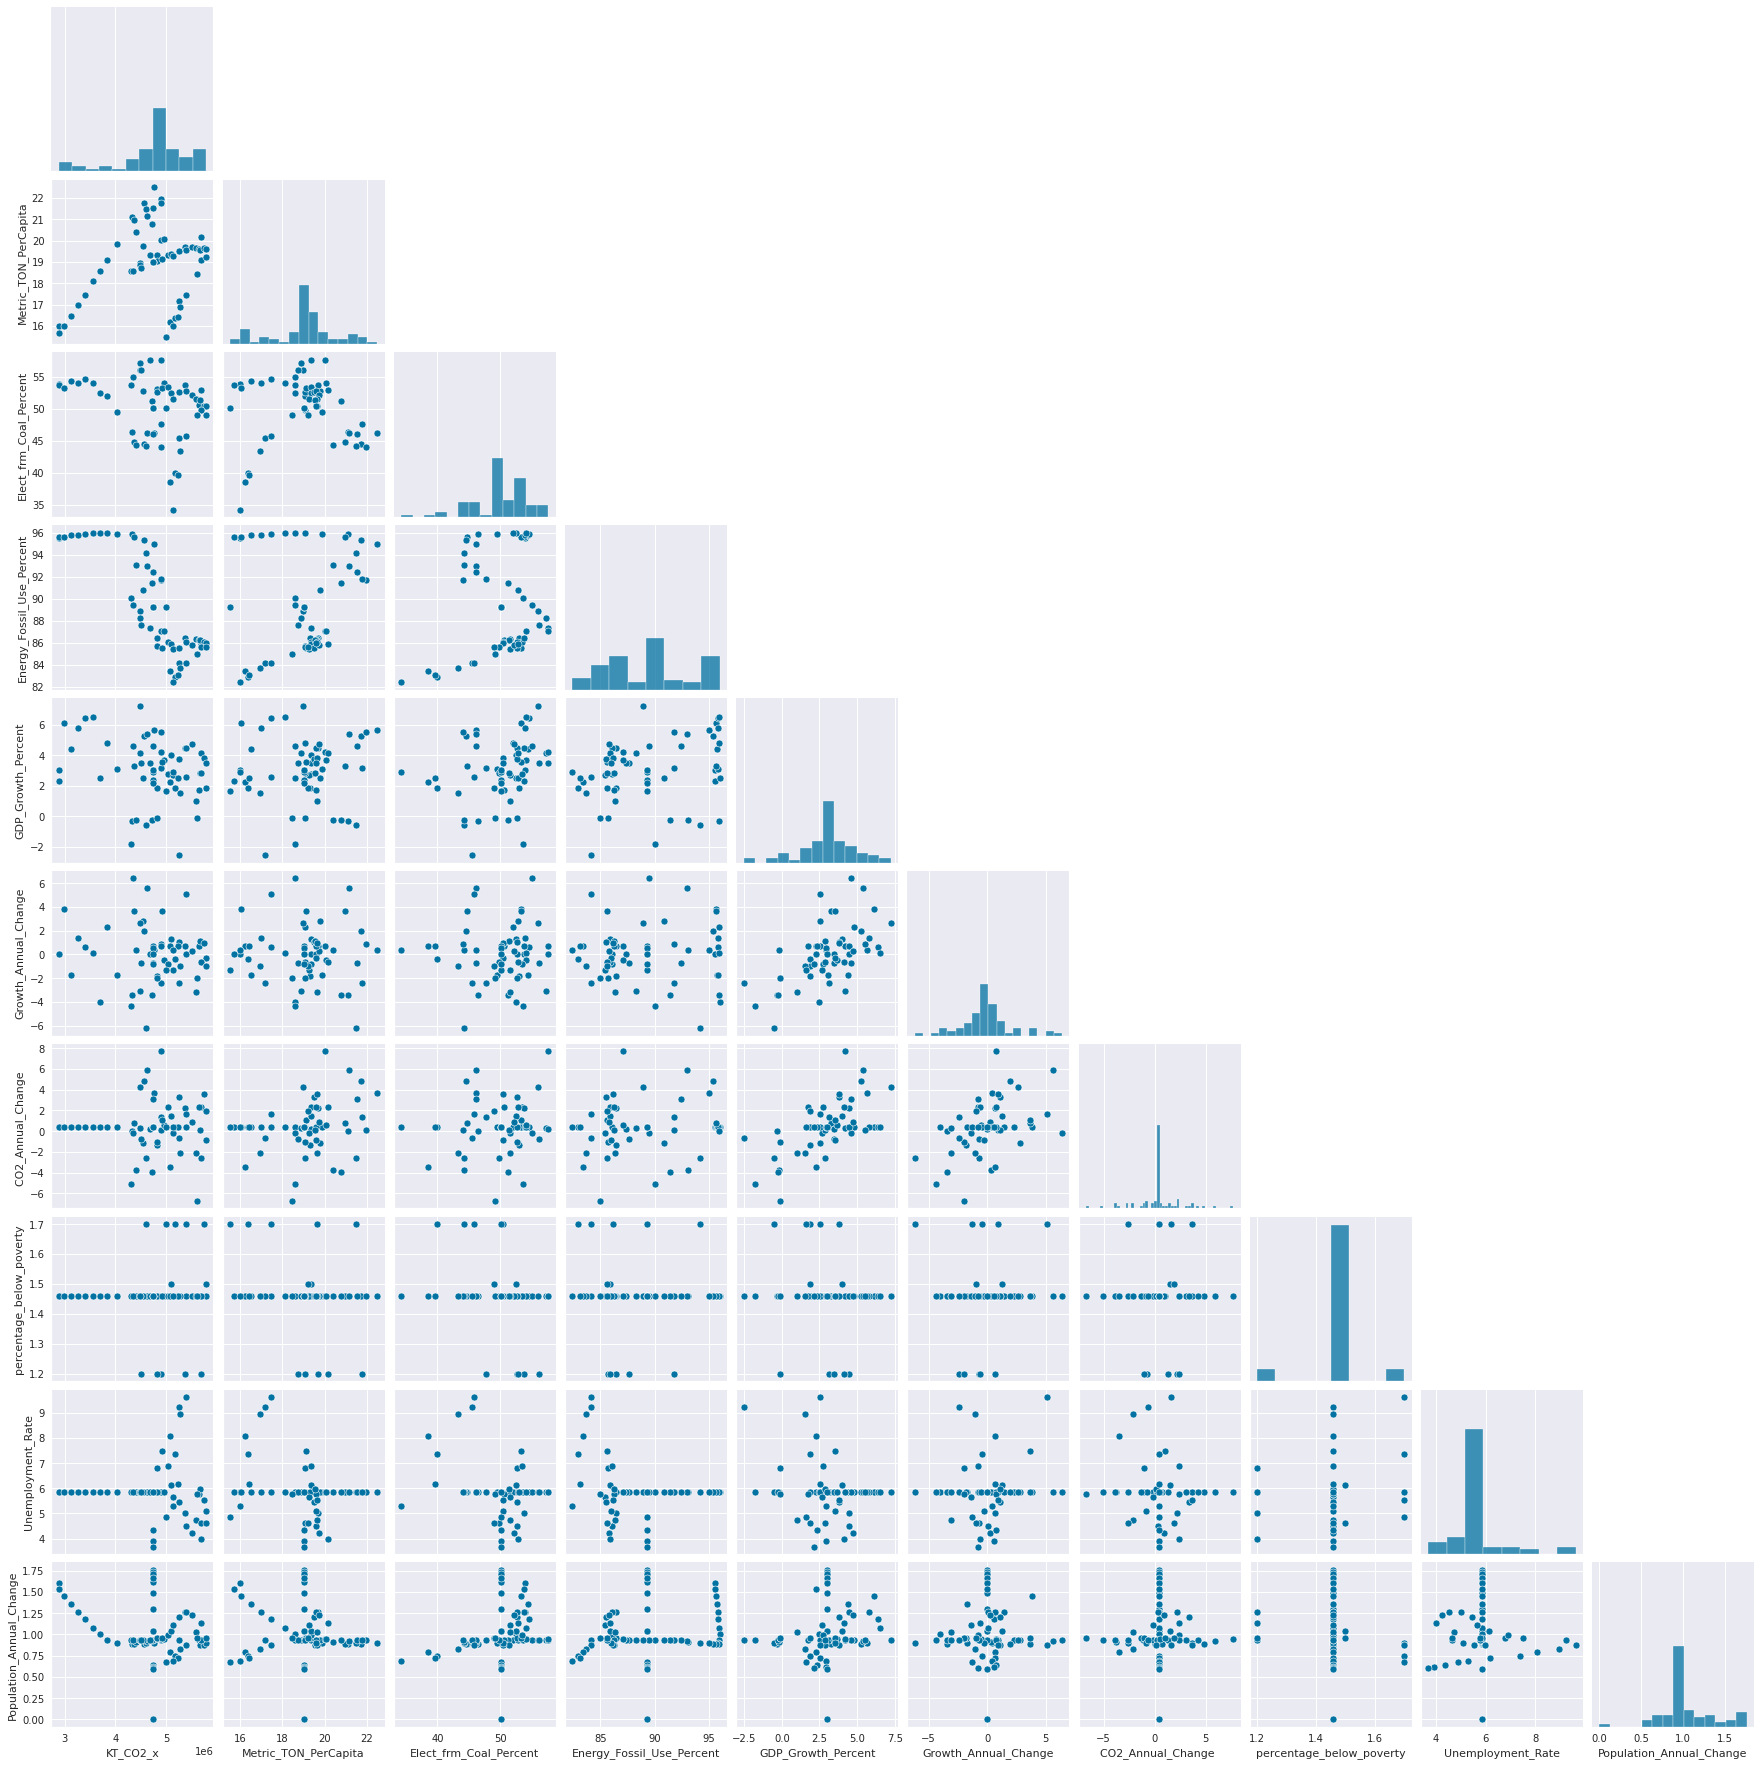

In [739]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 12))
sns.pairplot(df[['KT_CO2_x', 'Metric_TON_PerCapita', 'Elect_frm_Coal_Percent', 'Energy_Fossil_Use_Percent', 'GDP_Growth_Percent','Growth_Annual_Change', 'CO2_Annual_Change ','percentage_below_poverty','Unemployment_Rate','Population_Annual_Change']],corner=True, palette='Accent')

# Preparing Data for K-Means using Scikit Learn
As the data is out of scale we are using StandardScalar in order to scale the data.

In [740]:
scalar = StandardScaler()
X = scalar.fit_transform(df[df.columns[1:]])
df[df.columns[1:]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 17530 to 44194
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   KT_CO2_x                   74 non-null     float64
 1   Metric_TON_PerCapita       74 non-null     float64
 2   Elect_frm_Coal_Percent     74 non-null     float64
 3   Energy_Fossil_Use_Percent  74 non-null     float64
 4   GDP_Growth_Percent         74 non-null     float64
 5   Growth_Annual_Change       74 non-null     float64
 6   CO2_Annual_Change          74 non-null     float64
 7   percentage_below_poverty   74 non-null     float64
 8   Unemployment_Rate          74 non-null     float64
 9   Population_Annual_Change   74 non-null     float64
 10  percapita                  74 non-null     float64
dtypes: float64(11)
memory usage: 6.9 KB


## Implementing K-Means Algorithm

In [741]:
kmeansModel = KMeans(n_clusters = 2, init = 'k-means++', random_state = 50)
y_pred = kmeansModel.fit_predict(X)   

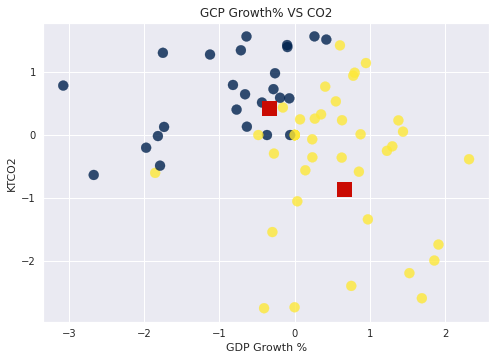

In [742]:
fig, ax = plt.subplots()
ax.scatter(X[:, 4], X[:, 0], c=y_pred, s=100,alpha=0.8,cmap='cividis_r')
ax.plot(kmeansModel.cluster_centers_[:, 0], kmeansModel.cluster_centers_[:, 4], 'rs', markersize=15)
plt.title('GCP Growth% VS CO2')
plt.xlabel('GDP Growth %')
plt.ylabel('KTCO2')
plt.show()

From the above graph we observe how the change in the levels of CO2 also pulls back the GDP growth Rate

Text(0, 0.5, 'KTCO2')

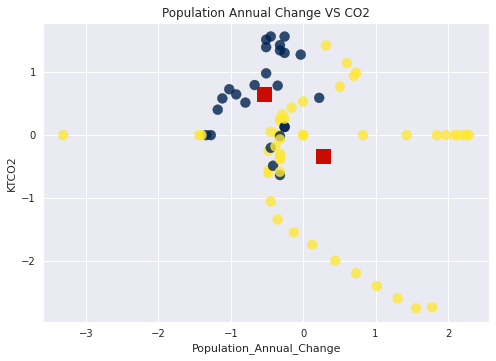

In [743]:
plt.scatter(X[:, 9], X[:, 0], c=y_pred,s=100,alpha=0.8,cmap='cividis_r')
plt.plot(kmeansModel.cluster_centers_[:, 9], kmeansModel.cluster_centers_[:, 0], 'rs', markersize=15)
plt.title('Population Annual Change VS CO2')
plt.xlabel('Population_Annual_Change')
plt.ylabel('KTCO2')

From the above we can deduce that as the production of KTCO2 increased it caused the rate of growth of population to plummet and vice versa. This is also evident by the reverse correlation which we have seen in the correlation matrix

# Using Complete Link
Agglomerative clustering using complete link

In [744]:
clustering = AgglomerativeClustering(linkage="complete").fit(X)
clustering.labels_

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1])

Text(0, 0.5, 'GDP Growth %')

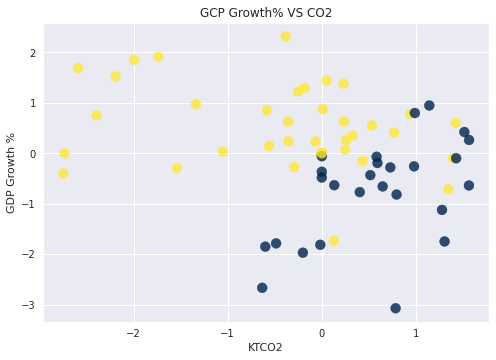

In [745]:
plt.scatter(X[:, 0], X[:, 4], c=clustering.labels_,s=100,alpha=0.8,cmap='cividis')
plt.title('GCP Growth% VS CO2')
plt.xlabel('KTCO2')
plt.ylabel('GDP Growth %')

# Tensor Flow for K-Means



In [ ]:
# For converting the data into tensors
def input_fn():
  return tf.compat.v1.train.limit_epochs(
      tf.convert_to_tensor(X, dtype=tf.float32), num_epochs=1)

# Number of clusters that is expected
num_clusters = 2

# Initialization of K-Means
kmeans = tf.compat.v1.estimator.experimental.KMeans(
    num_clusters=num_clusters, use_mini_batch=False)

# Variables to initialize Training
num_iterations = 10
previous_centers = None
for _ in range(num_iterations):
  kmeans.train(input_fn)


assignments = list(kmeans.predict_cluster_index(input_fn=input_fn))
centroid_values = kmeans.cluster_centers()
print(assignments)
assignments.count(0)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp7rhbaq4q', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:ten

In [ ]:
sns.set_style('whitegrid')
plt.scatter(X[:, 4], X[:, 0], c=assignments, s=100, alpha=0.8, cmap='cividis')
plt.plot(centroid_values[:, 4], centroid_values[:, 0], 'rs', markersize=15)
plt.title('GCP Growth% VS CO2')
plt.xlabel('GDP Growth %')
plt.ylabel('KTCO2')
plt.show()

In [ ]:
# We see a clear formation of clusters for Population and CO2 emission data. The Data points with growth of population and less Co2 emission is very clear
sns.set_style('whitegrid')
plt.scatter(X[:, 9], X[:, 0], c=assignments, s=100, alpha=0.8, cmap='cividis')
plt.plot(centroid_values[:, 9], centroid_values[:, 0], 'rs', markersize=15)
plt.title('Population Annual Change VS CO2')
plt.xlabel('Population_Annual_Change')
plt.ylabel('KT_CO2_x')
plt.show()

# Conclusion

1. We see that CO2 emission effects GDP and Population
2. Electricity from Coal also effects the GCP and the population percentage.

The above two interpretation leads us to define a business usecase of calculating/predicting the GDP growth rate and Population Annual Change as we move ahead with this project